In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from sklearn.model_selection import train_test_split
import seaborn as sns

In [6]:
path = r'C:\Users\9sup2\workspace\factorization_machine_tf\datasets\movielens'

In [7]:
os.listdir(path)

['.ipynb_checkpoints',
 'links.csv',
 'movies.csv',
 'ratings.csv',
 'README.txt',
 'tags.csv']

## ratings

In [8]:
ratings_df = pd.read_csv(os.path.join(path,"ratings.csv"),encoding='utf-8')

In [9]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [10]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [11]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [12]:
ratings_df.drop('timestamp',inplace=True,axis=1)

In [104]:
ratings_df.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [13]:
ratings_df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


## movies

In [230]:
movies_df = pd.read_csv(os.path.join(path,"movies.csv"),encoding='utf-8',index_col= 'movieId')

In [231]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9742 entries, 1 to 193609
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   9742 non-null   object
 1   genres  9742 non-null   object
dtypes: object(2)
memory usage: 228.3+ KB


In [232]:
movies_df.describe()

,title,genres
count,9742,9742
unique,9737,951
top,Emma (1996),Drama
freq,2,1053


In [233]:
movies_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [234]:
movies_df.shape

(9742, 2)

In [235]:
movies_df.isna().sum()

title     0
genres    0
dtype: int64

### movies-genre

In [236]:
genre_df =  movies_df['genres'].str.get_dummies(sep='|')

<AxesSubplot:>

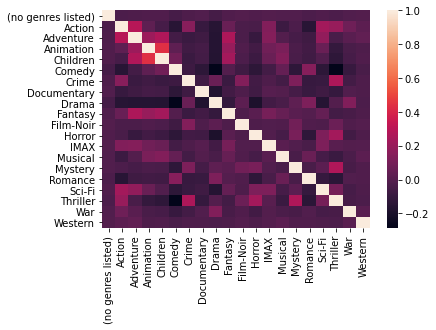

In [237]:
sns.heatmap(genre_df.corr())

In [238]:
movies_df = pd.concat([movies_df, genre_df],axis=1)

In [239]:
movies_df.drop("genres",inplace=True,axis=1)

In [240]:
movies_df.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### movies_year

In [241]:
movies_df['year'] = movies_df["title"].str.extract('(\(\d\d\d\d\))')

<AxesSubplot:>

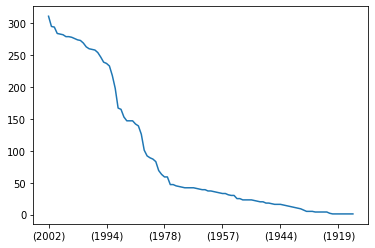

In [242]:
movies_df['year'].value_counts().plot()

In [243]:
movies_df.isna().sum()

title                  0
(no genres listed)     0
Action                 0
Adventure              0
Animation              0
Children               0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Fantasy                0
Film-Noir              0
Horror                 0
IMAX                   0
Musical                0
Mystery                0
Romance                0
Sci-Fi                 0
Thriller               0
War                    0
Western                0
year                  13
dtype: int64

In [244]:
movies_df.dropna(axis=0, inplace=True)

In [245]:
movies_df.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,(1995)
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(1995)
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,(1995)
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,(1995)
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,(1995)


In [246]:
movies_df['year']=movies_df['year'].apply(lambda x: str(x).replace('(','').replace(')',""))

In [247]:
movies_df.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1995
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1995
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995


In [248]:
movies_df.drop('title',axis=1,inplace=True)

In [249]:
movies_df

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movieId,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1995
2,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1995
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1995
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1995
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2017
193583,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2017
193585,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2017


In [250]:
movies_df = movies_df.reset_index()

In [251]:
movies_df

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
2,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1995
3,4,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1995
4,5,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9724,193581,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2017
9725,193583,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2017
9726,193585,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2017
9727,193587,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018


In [252]:
ratings_df.shape

(100836, 3)

In [253]:
ratings_df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [254]:
movies_df.shape

(9729, 22)

In [255]:
feature_vector = pd.merge(ratings_df,movies_df,how ="inner",on="movieId")

In [256]:
feature_vector

,userId,movieId,rating,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,1,4.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,5,1,4.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
2,7,1,4.5,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
3,15,1,2.5,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,17,1,4.5,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100813,610,160341,2.5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1997
100814,610,160527,4.5,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1971
100815,610,160836,3.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2005
100816,610,163937,3.5,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,2016


In [257]:
user_onehot = pd.get_dummies(feature_vector['userId'], prefix='user')

In [258]:
user_onehot.shape

(100818, 610)

In [259]:
item_onehot = pd.get_dummies(feature_vector['movieId'],prefix = 'movie')

In [260]:
item_onehot.shape

(100818, 9711)

In [261]:
concat_feature_vector = pd.concat([feature_vector,user_onehot,item_onehot],axis=1).drop("userId",axis=1).drop("movieId",axis=1)

In [262]:
concat_feature_vector.shape

(100818, 10343)

## final feature vector

```
user onehot 610 + item onehot 9724 + genres_df 20 + year 1 +rating 1 
== 10356
```

In [216]:
610 + 9724 + 20 + 1 + 1

10356

In [263]:
concat_feature_vector = concat_feature_vector.astype('float32')

In [264]:
concat_feature_vector.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100818 entries, 0 to 100817
Columns: 10343 entries, rating to movie_193609
dtypes: float32(10343)
memory usage: 3.9 GB


### target

In [265]:
target_rating = concat_feature_vector["rating"]

In [266]:
target_rating

0         4.0
1         4.0
2         4.5
3         2.5
4         4.5
         ... 
100813    2.5
100814    4.5
100815    3.0
100816    3.5
100817    3.5
Name: rating, Length: 100818, dtype: float32

In [267]:
concat_feature_vector.drop('rating',axis=1,inplace=True)

In [273]:
concat_feature_vector

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [269]:
X_train, X_test , y_train,y_test = train_test_split(concat_feature_vector,target_rating,test_size=0.1)

In [270]:
X_train.shape

(90736, 10342)

In [271]:
X_test.shape

(10082, 10342)